In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('sIMG_8253.JPG')

roi = img[:,:]
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

In [4]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

In [5]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 1)

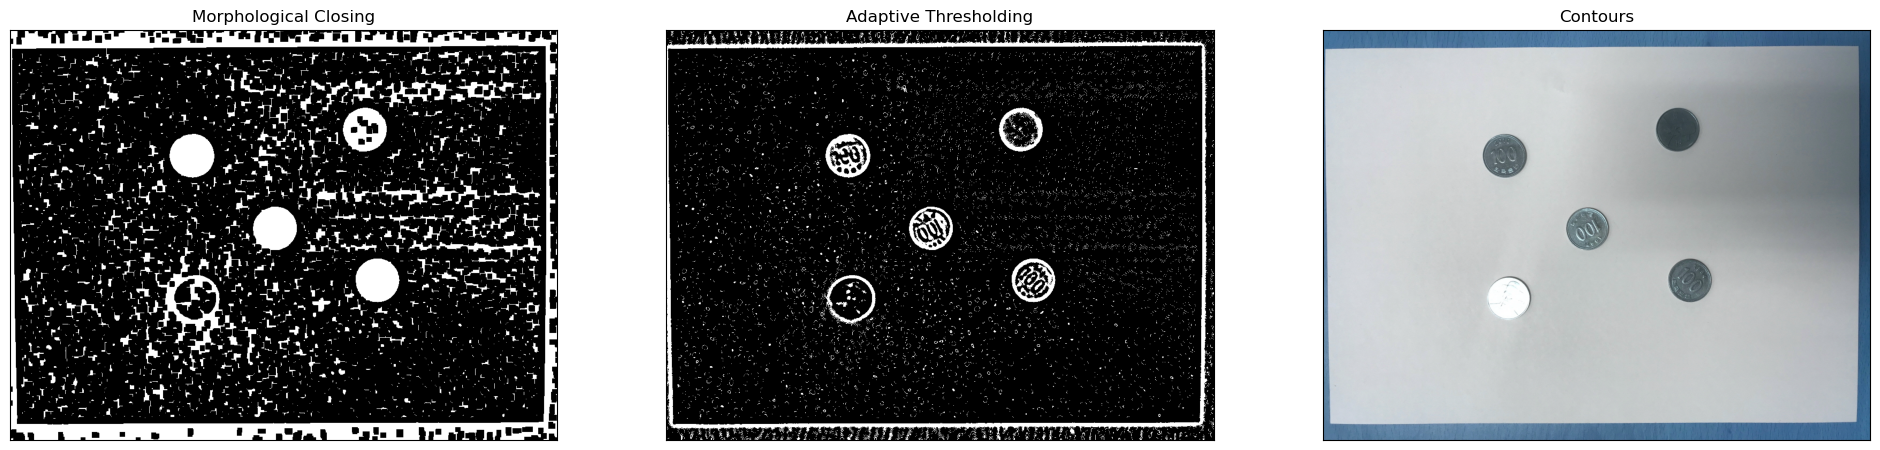

In [7]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(closing,cmap = 'gray')
plt.title('Morphological Closing'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(thresh,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(roi)
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.show()